11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 61s 128ms/step - loss: 0.2306 - accuracy: 0.9336 - val_loss: 0.0726 - val_accuracy: 0.9768
Epoch 2/10
469/469 [==============================] - 50s 106ms/step - loss: 0.0610 - accuracy: 0.9808 - val_loss: 0.0393 - val_accuracy: 0.9869
Epoch 3/10
469/469 [==============================] - 50s 106ms/step - loss: 0.0429 - accuracy: 0.9865 - val_loss: 0.0458 - val_accuracy: 0.9846
Epoch 4/10
469/469 [==============================] - 49s 103ms/step - loss: 0.0341 - accuracy: 0.9899 - val_loss: 0.0342 - val_accuracy: 0.9884
Epoch 5/10
469/469 [==============================] - 49s 105ms/step - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0281 - val_accuracy: 0.9909
Epoch 6/10
469/469 [==============================] - 50s 106ms/step - loss: 0.0214 - accuracy: 0.9937 - val_loss: 0.0332 - val_accuracy: 0.9896
Epoch 7/10
469/469 [==============================] - 50s 106ms/s

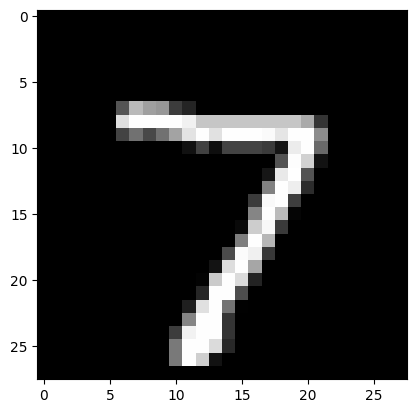

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Define the CNN architecture
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# Show predictions for a sample input image
sample_img = x_test[0]
sample_label = y_test[0]
sample_img = np.expand_dims(sample_img, 0)
pred = model.predict(sample_img)
pred_label = np.argmax(pred)
print("Sample image true label:", sample_label)
print("Sample image predicted label:", pred_label)

# Display the sample image
plt.imshow(sample_img.squeeze(), cmap='gray')
plt.show()
